- **Name - Kailash Konkal**
- **Project - Capstone Clothing Brand**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
data = pd.read_csv("Capstone.csv")

In [3]:
print('No. of rows',data.shape[0])
print('No. of columns',data.shape[1])
data.head()

No. of rows 4618
No. of columns 15


,Unnamed: 0,Sno,Brand,Price,Description,Category,Color,Product Code,Origin,Size,Product_Type,Material_Type,Wear_Type,Return_Time,Occasion
0,0,1,Old Navy,8711,Loose Satin Button-Down Shirt,Womens Wear,pink,4636,India,XL,Sportswear,Denim,Top Wear,7 Days Return & Excahnge,Casual
1,1,2,Old Navy,12871,High-Waisted OG Loose Cotton-Hemp Blend Jeans ...,Womens Wear,yellow,1082,US,M,Formal Trouser,Polyster,Bottom Wear,14 Days Return & Excahnge,Casual
2,2,3,Old Navy,5383,Luxe Tunic T-Shirt,Womens Wear,red,8375,UK,M,Formal Trouser,Denim,Bottom Wear,14 Days Return & Excahnge,Regular
3,3,4,Old Navy,7463,Loose Crepe Button-Down Shirt,Womens Wear,olive,3106,India,M,Formal Shirt,Cotton,Bottom Wear,14 Days Return & Excahnge,Celebration
4,4,5,Old Navy,12455,Tie-Shoulder Underwire One-Piece Swimsuit,Womens Wear,red,9260,US,XXL,Jeans,Denim,Bottom Wear,7 Days Return & Excahnge,Celebration


In [4]:
data.columns

Index(['Unnamed: 0', 'Sno', 'Brand', 'Price', 'Description', 'Category',
       'Color', 'Product Code', 'Origin', 'Size', 'Product_Type',
       'Material_Type', 'Wear_Type', 'Return_Time', 'Occasion'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4618 entries, 0 to 4617
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     4618 non-null   int64 
 1   Sno            4618 non-null   int64 
 2   Brand          4618 non-null   object
 3   Price          4618 non-null   int64 
 4   Description    4618 non-null   object
 5   Category       4618 non-null   object
 6   Color          4618 non-null   object
 7   Product Code   4618 non-null   int64 
 8   Origin         4618 non-null   object
 9   Size           4618 non-null   object
 10  Product_Type   4618 non-null   object
 11  Material_Type  4618 non-null   object
 12  Wear_Type      4618 non-null   object
 13  Return_Time    4618 non-null   object
 14  Occasion       4618 non-null   object
dtypes: int64(4), object(11)
memory usage: 541.3+ KB


In [6]:
# As we have 15 columns let's sort columns by their datatypes 
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Unnamed: 0', 'Sno', 'Price', 'Product Code'], object: ['Brand', 'Description', 'Category', 'Color', 'Origin', 'Size', 'Product_Type', 'Material_Type', 'Wear_Type', 'Return_Time', 'Occasion']}

**Observation-:**

- In this Capstone Dataset we have 4618 rows and 15 column.
- Out of 15 columns we have 11 features with object datatypes and rest are int64 types.
- Here we have Target Variables 'Price'

# Statistical Analysis

In [7]:
data.duplicated().sum()

0

**Dataset doesnot contains Any duplicate entry.So Yes to go.**

**Missing value check**

In [8]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

               Missing_values  %Missing values
Unnamed: 0                  0              0.0
Sno                         0              0.0
Brand                       0              0.0
Price                       0              0.0
Description                 0              0.0
Category                    0              0.0
Color                       0              0.0
Product Code                0              0.0
Origin                      0              0.0
Size                        0              0.0
Product_Type                0              0.0
Material_Type               0              0.0
Wear_Type                   0              0.0
Return_Time                 0              0.0
Occasion                    0              0.0


**There is no missing data!! This will make it easier to work with the dataset.**

**Statistical Matrix**

In [9]:
data.drop(["Unnamed: 0","Sno"], axis =  1, inplace =True)

<Axes: >

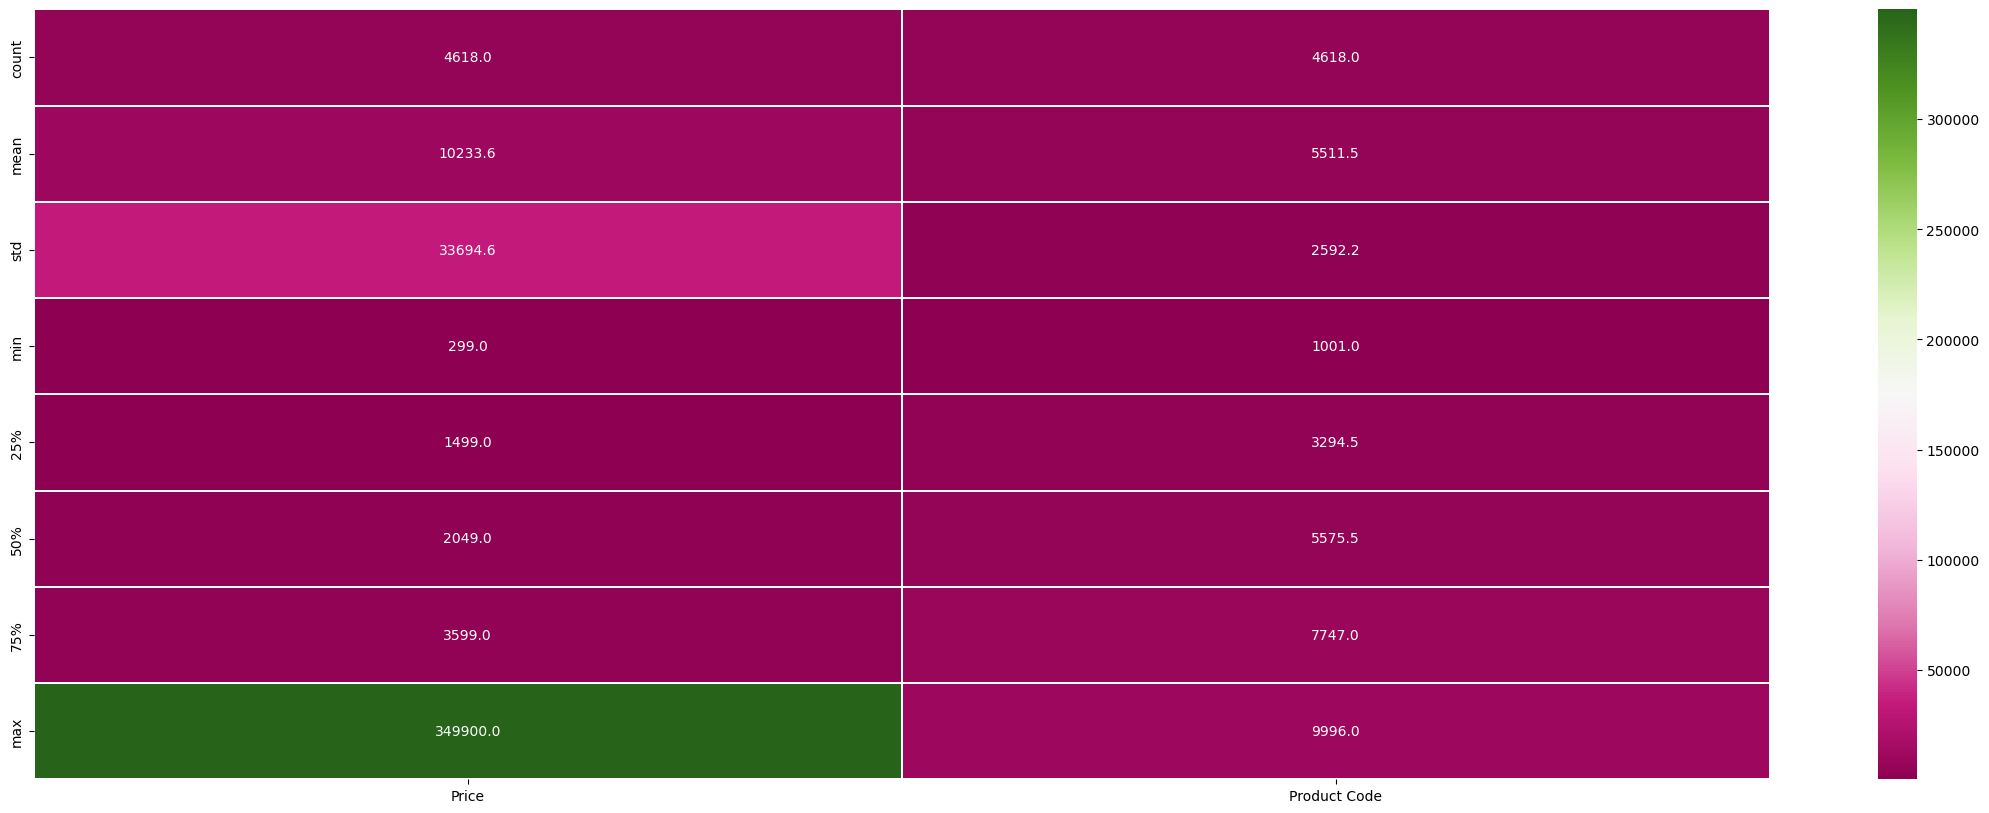

In [10]:
# visulaize the statistic of the columns using heatmap.
plt.figure(figsize=(28,10))
sns.heatmap(data.describe(),linewidths = 0.1, fmt='0.1f', annot = True, cmap='PiYG')

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,4618.0,10233.599827,33694.574163,299.0,1499.0,2049.0,3599.0,349900.0
Product Code,4618.0,5511.497401,2592.173508,1001.0,3294.5,5575.5,7747.0,9996.0


# EDA

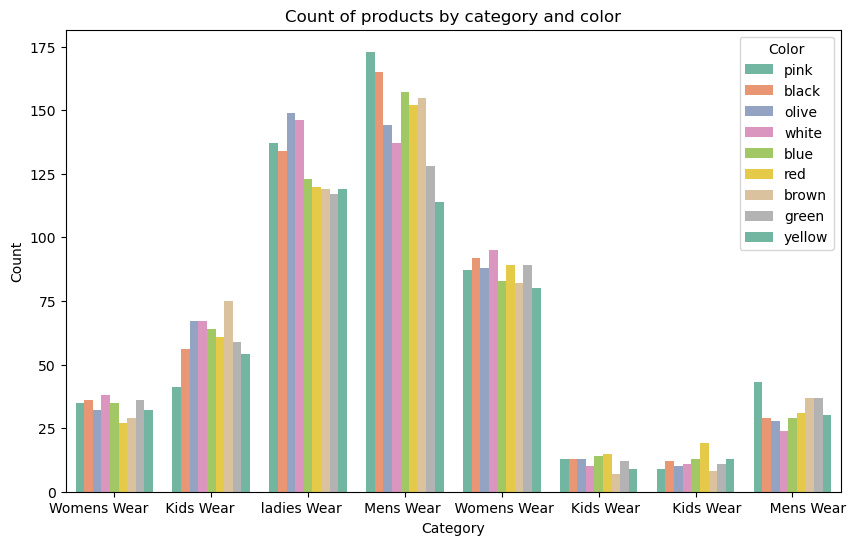

In [12]:
#Create countplot
plt.figure(figsize=(10,6))
sns.countplot(data=data, x = 'Category', hue = 'Color', palette='Set2', hue_order = data['Color'].value_counts().index)
plt.title("Count of products by category and color")
plt.xlabel('Category')
plt.ylabel("Count")
plt.legend(title = 'Color')
plt.show()

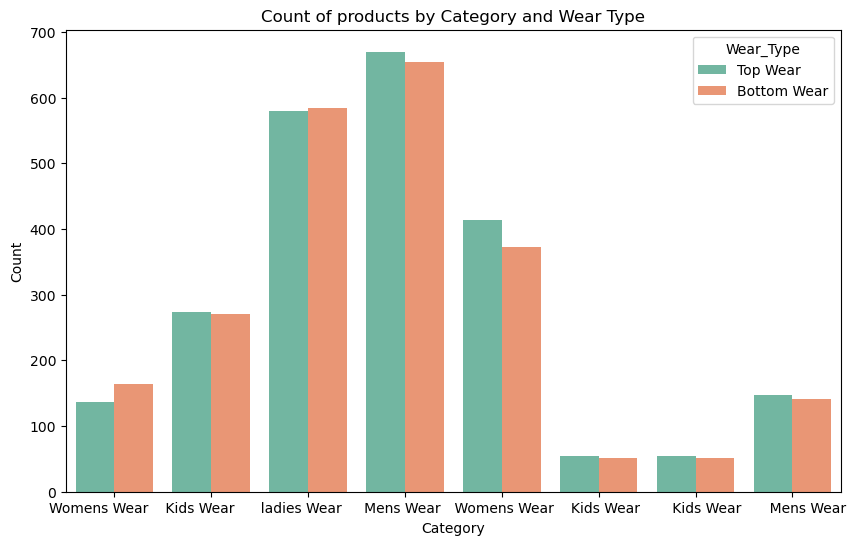

In [13]:
#Create countplot
plt.figure(figsize=(10,6))
sns.countplot(data=data, x = 'Category', hue = 'Wear_Type', palette='Set2', hue_order = data['Wear_Type'].value_counts().index)
plt.title("Count of products by Category and Wear Type")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title = 'Wear_Type')
plt.show()

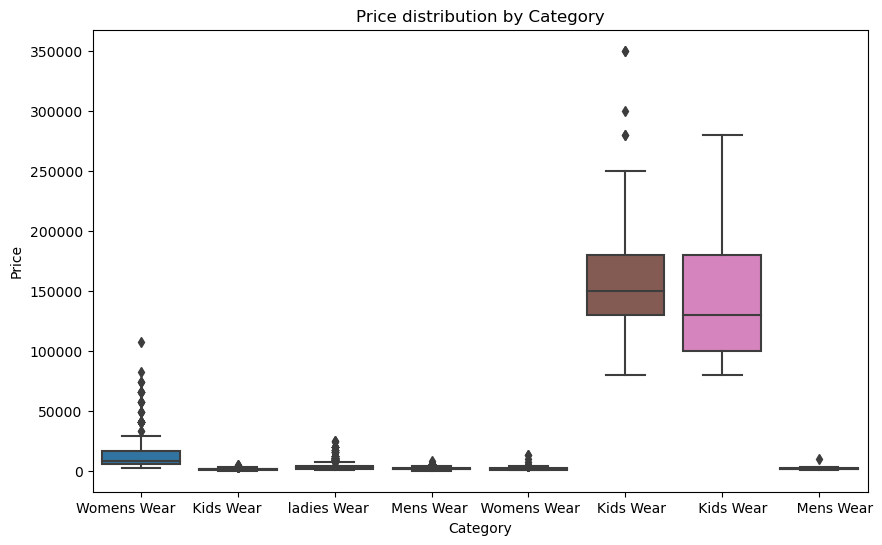

In [14]:
#Price distribution by category
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x = 'Category', y = 'Price')
plt.title("Price distribution by Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.show()

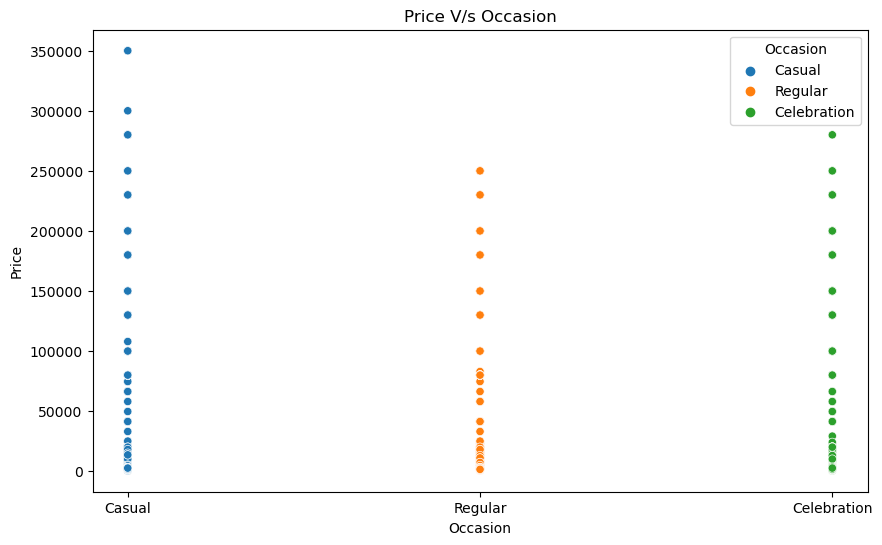

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x = 'Occasion', y = 'Price',hue = 'Occasion')
plt.title("Price V/s Occasion")
plt.xlabel("Occasion")
plt.ylabel("Price")
plt.show()

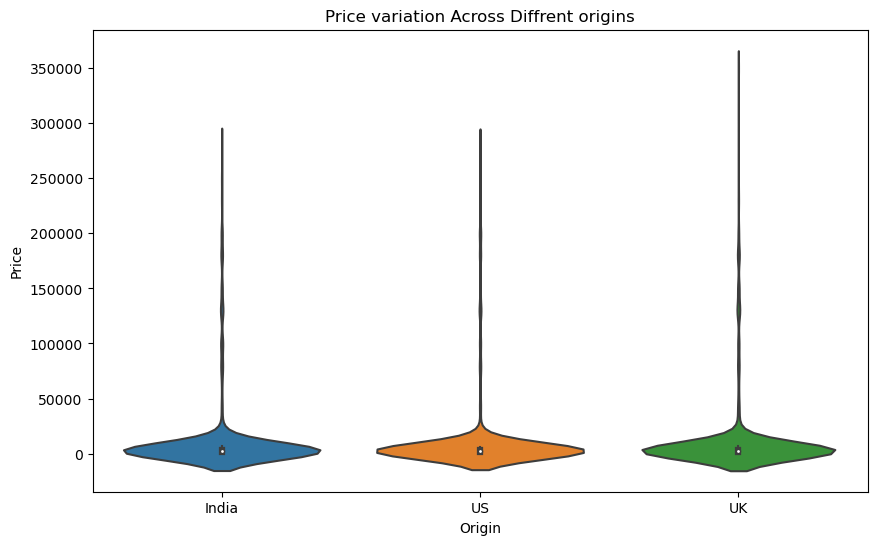

In [16]:
#Price variation Across Diffrent origins
plt.figure(figsize=(10,6))
sns.violinplot(data=data, x = 'Origin', y = 'Price')
plt.title("Price variation Across Diffrent origins")
plt.xlabel("Origin")
plt.ylabel("Price")
plt.show()

<Figure size 1000x600 with 0 Axes>

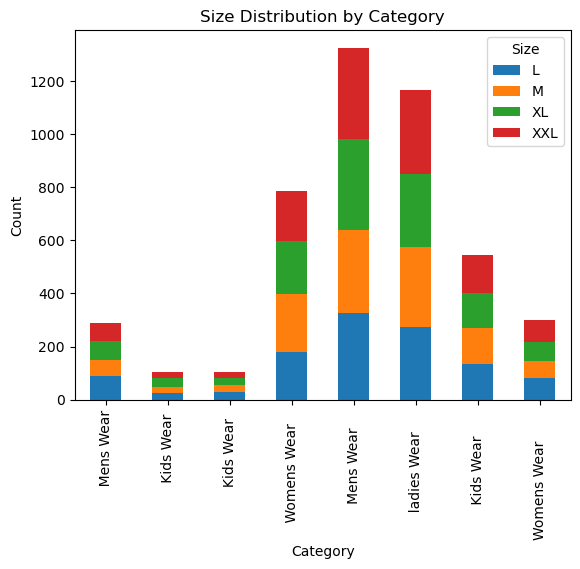

In [17]:
#Size Distribution by Category
size_category = data.groupby(['Category','Size']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
size_category.plot(kind = 'bar', stacked = True)
plt.title("Size Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title='Size')
plt.show()

In [18]:
# Extract numeric days from Return_Time
data['Return_Time_Num'] = data['Return_Time'].str.extract('(\d+)').astype(int)

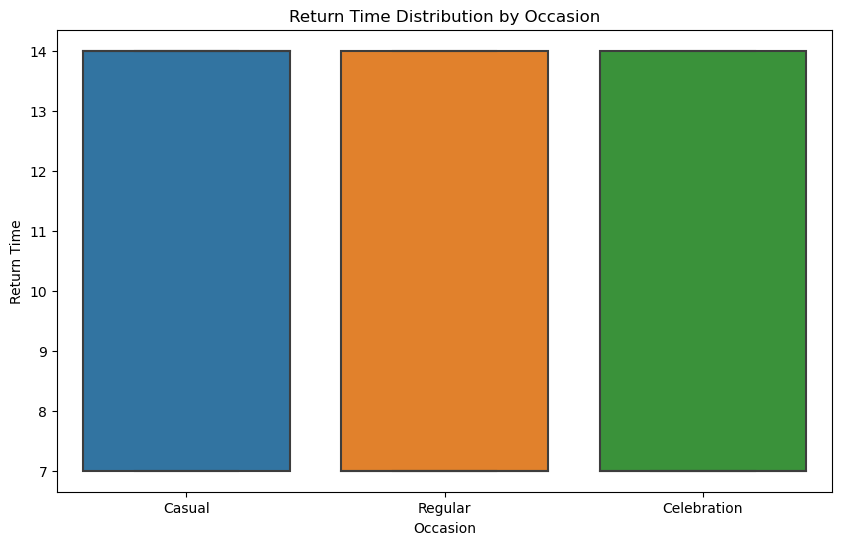

In [19]:
# Retuen time distributuion by occasion
plt.figure(figsize =(10,6))
sns.boxplot(data =data, x ='Occasion',y ='Return_Time_Num', order = ['Casual','Regular','Celebration'])
plt.title("Return Time Distribution by Occasion")
plt.xlabel("Occasion")
plt.ylabel("Return Time")
plt.show()

# Encoding Categorial Data

In [20]:
categoriall = ['Brand','Description', 'Category', 'Color', 'Origin', 'Size', 'Product_Type',
               'Material_Type', 'Wear_Type', 'Return_Time', 'Occasion']

In [21]:
data.drop(["Return_Time_Num"], axis =  1, inplace =True)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categoriall:
    data[i]=le.fit_transform(data[i])
data.head()

,Brand,Price,Description,Category,Color,Product Code,Origin,Size,Product_Type,Material_Type,Wear_Type,Return_Time,Occasion
0,7,8711,2849,7,5,4636,0,2,3,1,1,1,0
1,7,12871,2805,7,8,1082,2,1,1,2,0,0,0
2,7,5383,2859,7,6,8375,1,1,1,1,0,0,2
3,7,7463,2847,7,4,3106,0,1,0,0,0,0,1
4,7,12455,2919,7,6,9260,2,3,2,1,0,1,1


# Outlier detection and removal

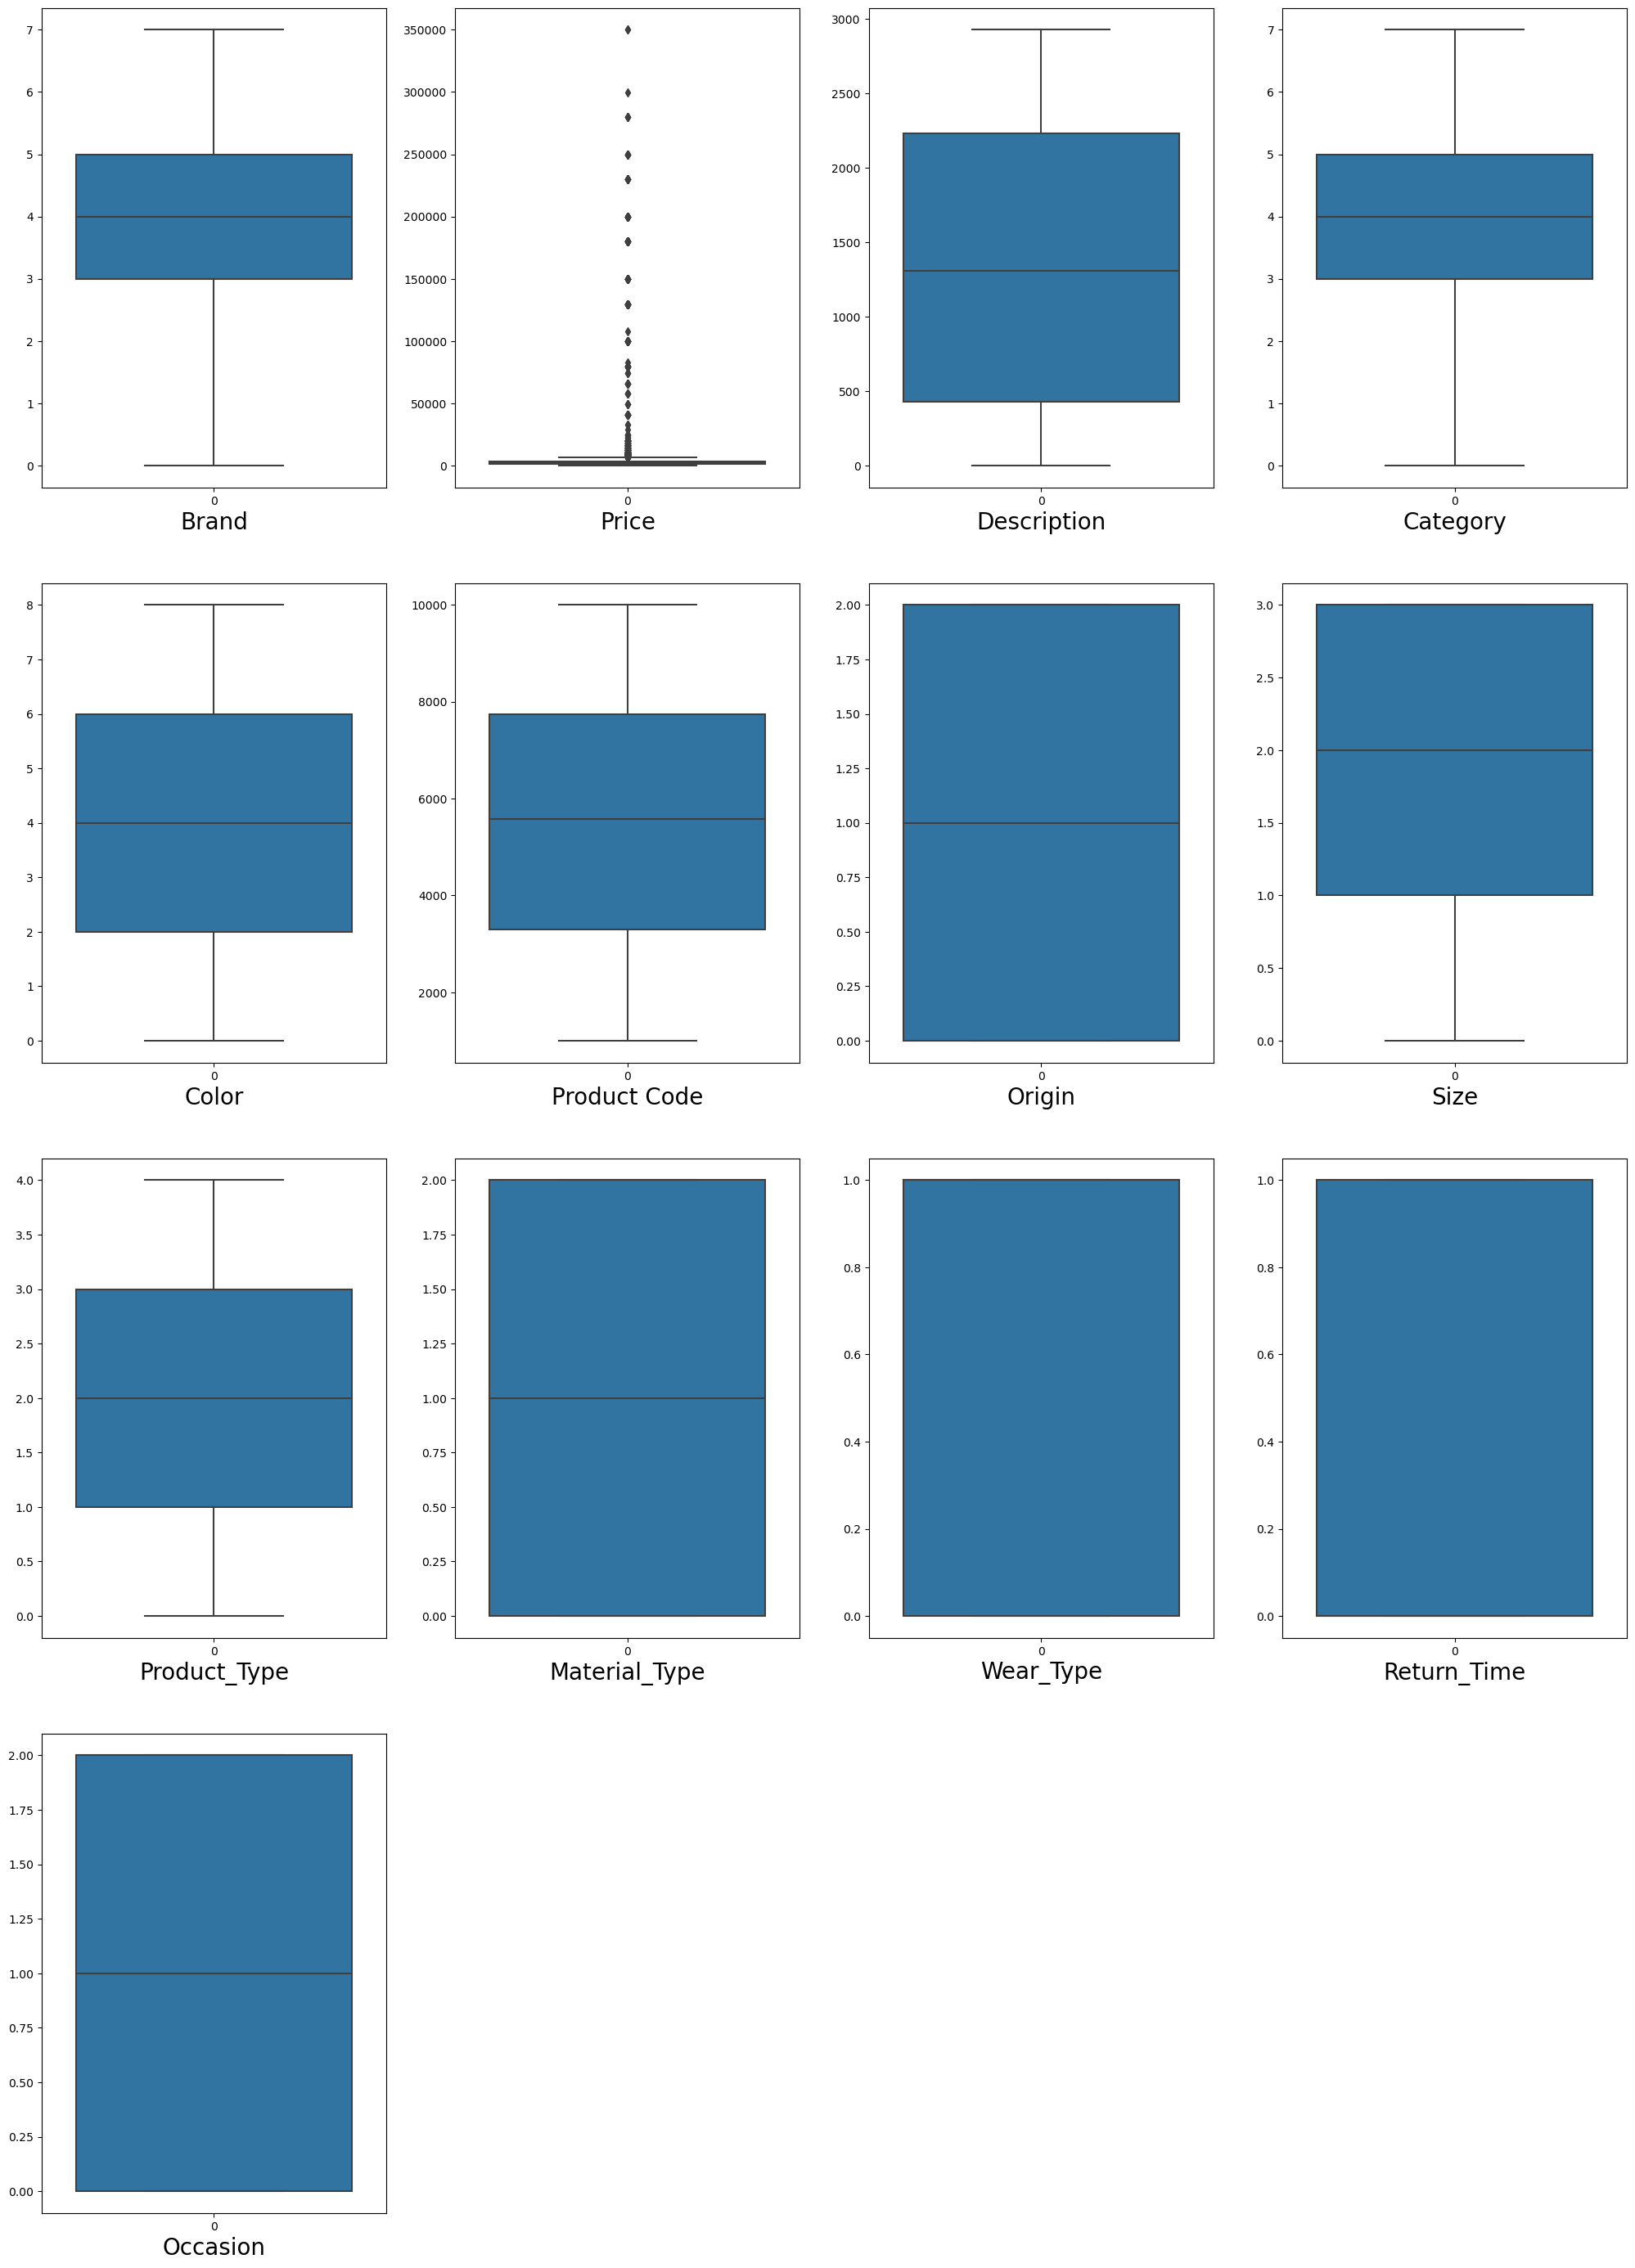

In [23]:
plt.figure(figsize=(25,35), facecolor='white')
plotnumber = 1
for column in data:
    if plotnumber <=14:
        ax = plt.subplot(4,4, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.show()

In [24]:
data.shape

(4618, 13)

**Z-Score**

In [25]:
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold = 3
df = data[(z<3).all(axis = 1)]

In [26]:
print("Shape of dataset after removing outliers :",df.shape)

Shape of dataset after removing outliers : (4464, 13)


In [27]:
print("Percentage Data Loss",((4618-4464)/4618)*100,'%')

Percentage Data Loss 3.3347769597228236 %


In [28]:
data = df.copy()

# Correlation

In [29]:
data.corr()

,Brand,Price,Description,Category,Color,Product Code,Origin,Size,Product_Type,Material_Type,Wear_Type,Return_Time,Occasion
Brand,1.000000,-0.021893,0.893069,1.000000,0.001273,0.004388,-0.016888,0.018836,-0.009335,-0.029822,-0.018804,-0.003079,-0.029807
Price,-0.021893,1.000000,0.010302,-0.021893,0.003792,-0.002728,-0.021754,0.012076,-0.002496,0.012193,-0.008444,-0.022775,-0.012171
Description,0.893069,0.010302,1.000000,0.893069,-0.000785,-0.004951,-0.005349,0.016340,-0.014596,-0.016453,-0.019296,-0.001376,-0.025236
Category,1.000000,-0.021893,0.893069,1.000000,0.001273,0.004388,-0.016888,0.018836,-0.009335,-0.029822,-0.018804,-0.003079,-0.029807
Color,0.001273,0.003792,-0.000785,0.001273,1.000000,-0.021340,-0.029409,0.007503,-0.031513,0.006739,-0.012626,0.010775,0.002277
Product Code,0.004388,-0.002728,-0.004951,0.004388,-0.021340,1.000000,-0.027660,0.006636,-0.005198,0.017618,-0.003879,0.004912,0.020481
Origin,-0.016888,-0.021754,-0.005349,-0.016888,-0.029409,-0.027660,1.000000,0.012810,-0.003694,0.004029,0.019333,0.023757,0.013515
Size,0.018836,0.012076,0.016340,0.018836,0.007503,0.006636,0.012810,1.000000,-0.013533,-0.013996,0.017093,0.025038,-0.017022
Product_Type,-0.009335,-0.002496,-0.014596,-0.009335,-0.031513,-0.005198,-0.003694,-0.013533,1.000000,0.006107,0.010079,-0.007562,0.010410
Material_Type,-0.029822,0.012193,-0.016453,-0.029822,0.006739,0.017618,0.004029,-0.013996,0.006107,1.000000,0.005279,0.009387,-0.004394


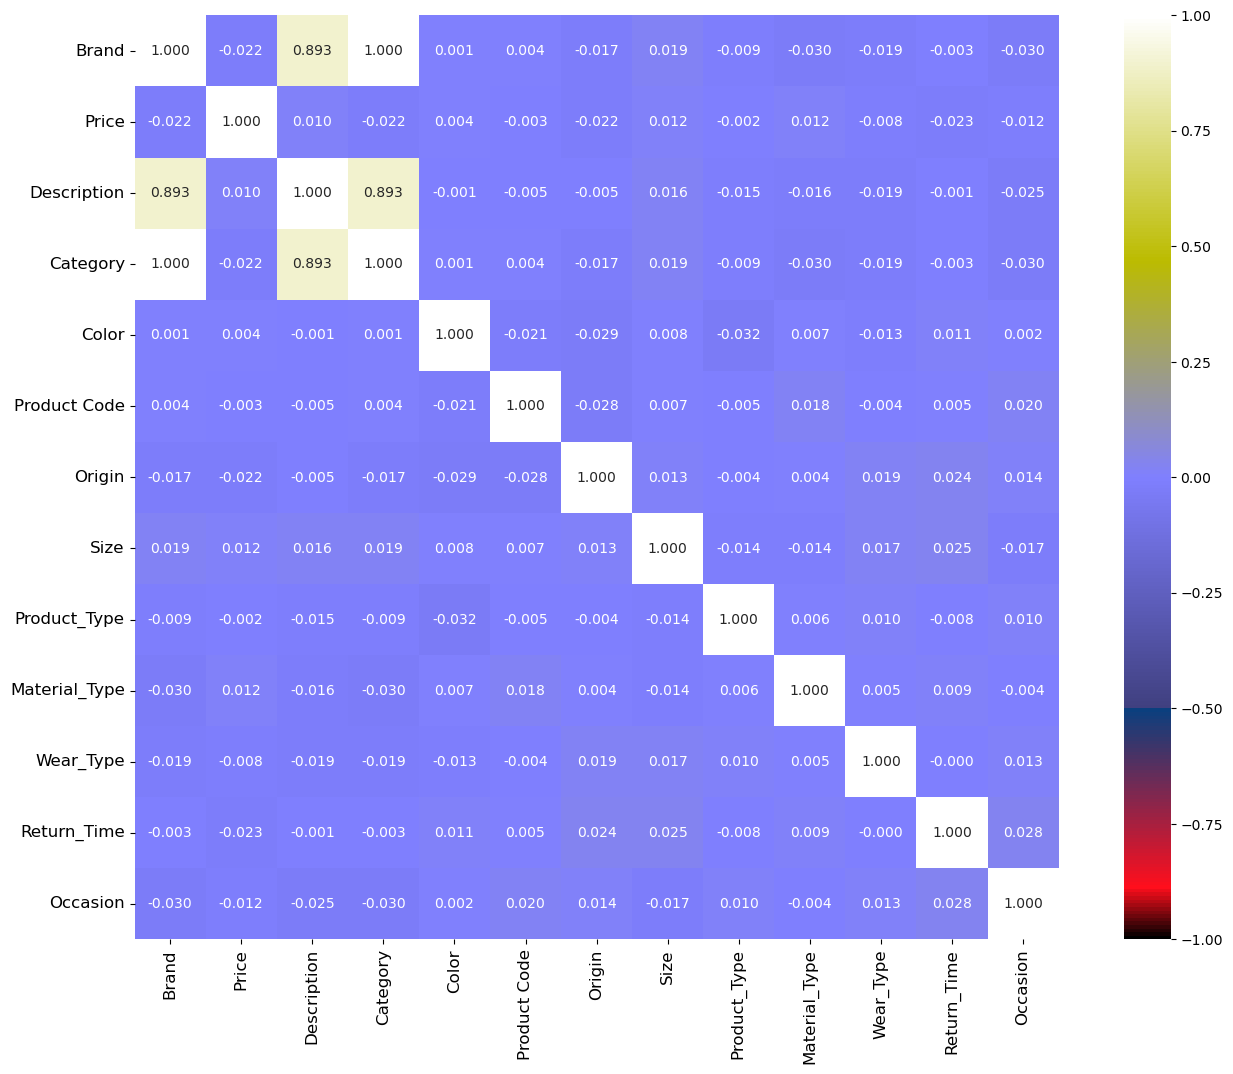

In [30]:
plt.figure(figsize=(17,12))
sns.heatmap(data.corr(),vmin=-1,vmax = 1, annot = True, square = True, fmt='0.3f',
           annot_kws={'size':10},cmap='gist_stern')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

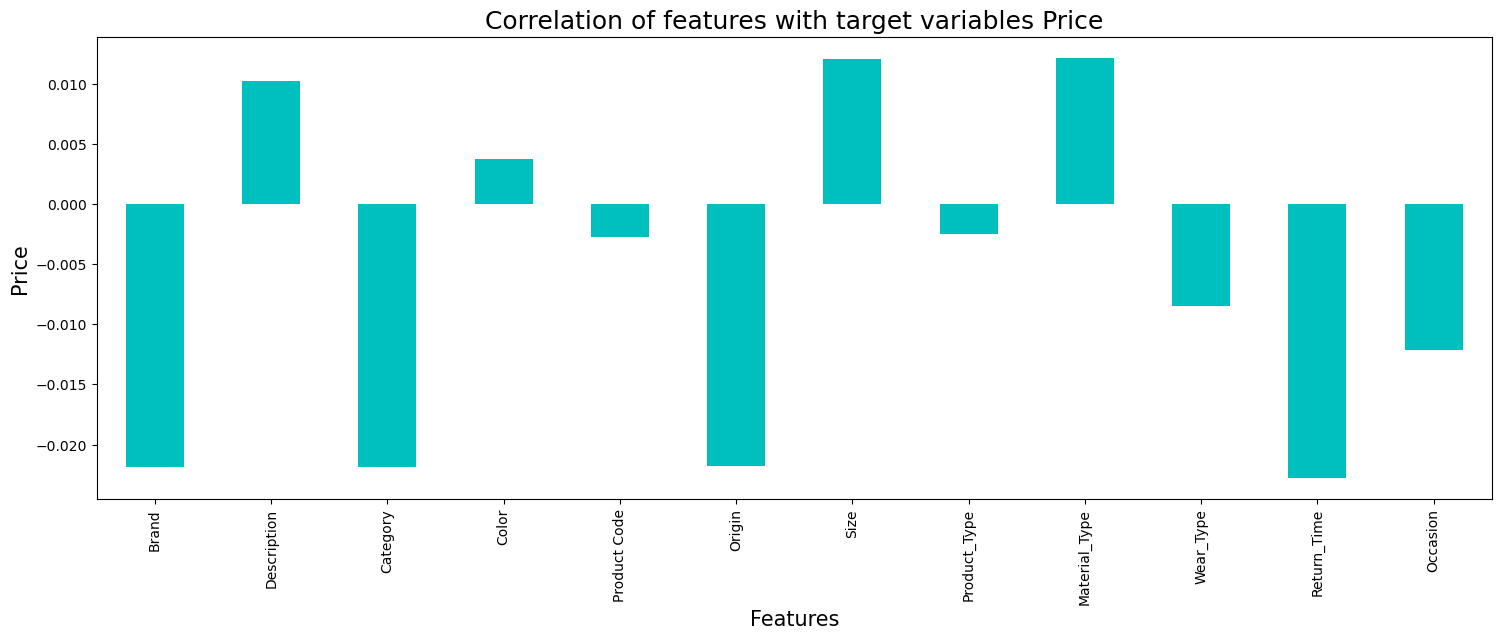

In [31]:
plt.figure(figsize=(18,6))
data.corr()['Price'].drop(['Price']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features',fontsize = 15)
plt.ylabel('Price',fontsize=15)
plt.title('Correlation of features with target variables Price',fontsize=18)
plt.show()

# Checking Multicollinearity between features using variance_inflation_factor

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
vif['Features']=data.columns
vif

,VIF,Features
0,inf,Brand
1,1.148604,Price
2,13.943919,Description
3,inf,Category
4,3.070365,Color
5,4.735745,Product Code
6,2.373632,Origin
7,2.691863,Size
8,2.773636,Product_Type
9,2.427395,Material_Type


# Skewness of features

In [33]:
data.skew()

Brand           -0.807662
Price            6.574378
Description      0.073982
Category        -0.807662
Color            0.001398
Product Code    -0.014254
Origin          -0.000818
Size            -0.021499
Product_Type     0.007292
Material_Type   -0.049590
Wear_Type       -0.011653
Return_Time      0.005378
Occasion        -0.002061
dtype: float64

# Standard Scaling

In [34]:
x = data.drop('Price',axis =1)
y = data['Price']

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# Machine Learning Model Building

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.2, random_state=42)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (3571, 12)
Training target vector : (3571,)
Test feature matrix size : (893, 12)
Test target vector size : (893,)


In [38]:
models =[
    LinearRegression(),
    SVR(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    Lasso(),
    Ridge()]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Errors of ',m,'is' + '\033[0m')
    print('\n')
    print('\033[1m'+'Mean absolute error :' + '\033[0m\n',mean_absolute_error(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix' + '\033[0m \n',mean_squared_error(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report' + '\033[0m \n',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    print('\033[1m'+'R2 Score' + '\033[0m')
    print(r2_score(y_test,y_pred))
    print('===================================================================================================================')

Errors of  LinearRegression() is


Mean absolute error :
 4840.327424857287


Confusion Matrix 
 193280266.54539227


Classification Report 
 13902.52734381027


R2 Score
-0.004959820328145348
Errors of  SVR() is


Mean absolute error :
 3836.729123290269


Confusion Matrix 
 203099654.90728495


Classification Report 
 14251.303621328294


R2 Score
-0.05601568309301985
Errors of  DecisionTreeRegressor() is


Mean absolute error :
 2509.740201567749


Confusion Matrix 
 61358830.90257559


Classification Report 
 7833.187786755504


R2 Score
0.6809650525553488
Errors of  KNeighborsRegressor() is


Mean absolute error :
 4068.362374020157


Confusion Matrix 
 173170207.98978725


Classification Report 
 13159.415184186084


R2 Score
0.09960233282929054
Errors of  RandomForestRegressor() is


Mean absolute error :
 1988.3796416573348


Confusion Matrix 
 33120679.82803315


Classification Report 
 5755.056891815506


R2 Score
0.827789183841439
Errors of  AdaBoostRegressor() is


Mean abs

# Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score
rf= RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
y_pred = rf.predict(x_test)
    
print("Errors of",rf,":")
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2_Score',r2_score(y_test,y_pred))

Errors of RandomForestRegressor() :
Mean absolute error : 1995.012004479283
Mean Squared error : 34203145.162789695
Root Mean Squared error 5848.34550644793


R2_Score 0.8221609105170492


# Hyper Parameter Tuning: GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param = [{'n_estimators':[10,50,100,130],
         'criterion':['squared_error','absolute_error','poisson','friedman_mse'],
         'max_depth':range(2,4,1),
         'max_features':['auto','log2']
         }]


In [42]:
gc = GridSearchCV(RandomForestRegressor(),param,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[C

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'criterion': ['squared_error', 'absolute_error',
                                        'poisson', 'friedman_mse'],
                          'max_depth': range(2, 4),
                          'max_features': ['auto', 'log2'],
                          'n_estimators': [10, 50, 100, 130]}],
             verbose=5)

In [43]:
gc.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'log2',
 'n_estimators': 10}

# Final Model

In [44]:
final =RandomForestRegressor(n_estimators = 130,criterion= 'poisson', max_depth = 3, max_features = 'log2')
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final RandomForest Regressor Evaluation")
print('\n')
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Score',r2_score(y_test,y_pred))

 Final RandomForest Regressor Evaluation


Mean absolute error : 2865.717933828332
Mean Squared error : 58128649.76659541
Root Mean Squared error 7624.214698353884
R2_Score 0.6977603639032852


# Predection the final model

True Values Vs Predicted Value Plot :


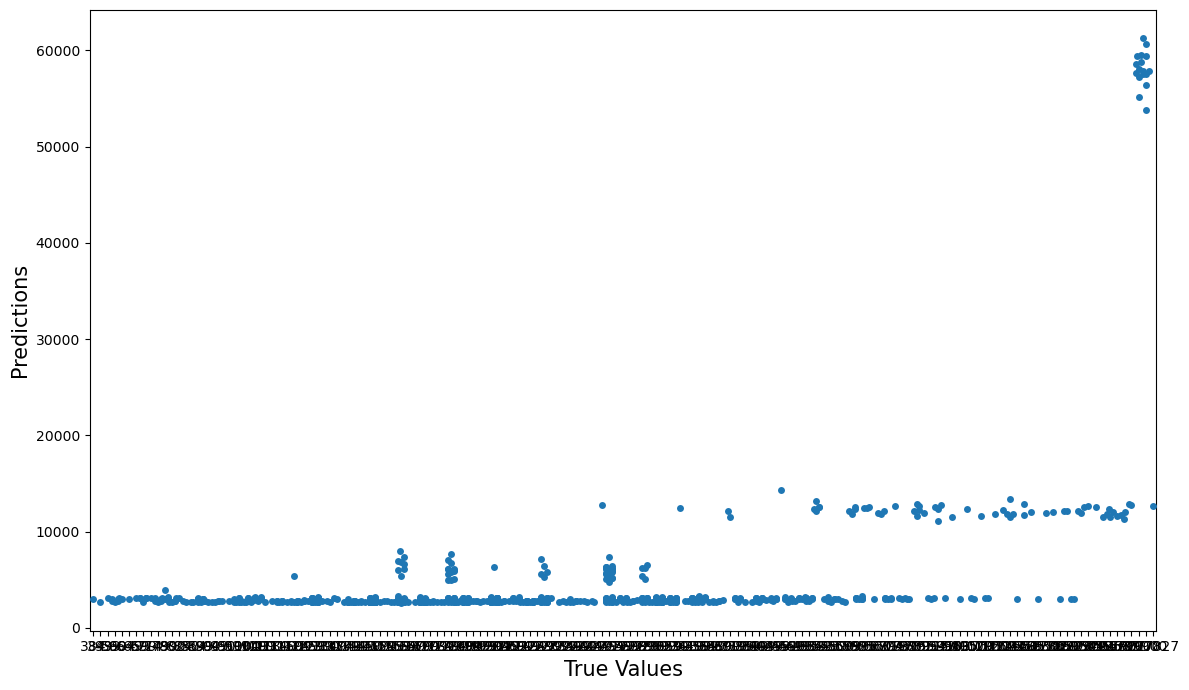

In [45]:
plt.figure(figsize=(12,7))
y_Pred = final.predict(x_test)
sns.swarmplot(x=y_test.round(2),y= y_pred)
print("True Values Vs Predicted Value Plot :")
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions',fontsize=15)
plt.tight_layout()

# Saving Model

In [46]:
import joblib
joblib.dump(final,"capstone_project")

['capstone_project']

# Now, we will predict occasion-:

**Standard Scaling**

In [47]:
x = data.drop('Occasion',axis =1)
y = data['Occasion']

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

**Machine Learning and Model Learning**

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier


In [50]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.33, random_state=42)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (2990, 12)
Training target vector : (2990,)
Test feature matrix size : (1474, 12)
Test target vector size : (1474,)


**Finding Best random rate**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
maxAccu=0
maxRs=0
for i in range (1,250):
    x_train,x_test,y_train,y_test= train_test_split(x_scale,y,test_size = 0.33, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu, 'on Random_state',maxRS)

Best accuracy is 0.3683853459972863 on Random_state 152


# Logistic Regression

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=.33,random_state=242)
lrr = LogisticRegression()
lrr.fit(x_train,y_train)
y_pred = lrr.predict(x_test)
print("Logistic Regression Evaluation")
print('\n')
print("Accuracy Score Of Logistic Regression : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Logistic Regression : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Logistic Regression : ", classification_report(y_test,y_pred))

Logistic Regression Evaluation


Accuracy Score Of Logistic Regression :  0.33989145183175035
Confusion Matrix Of Logistic Regression :  [[204 102 162]
 [222 118 150]
 [226 111 179]]
Classification Report Of Logistic Regression :                precision    recall  f1-score   support

           0       0.31      0.44      0.36       468
           1       0.36      0.24      0.29       490
           2       0.36      0.35      0.36       516

    accuracy                           0.34      1474
   macro avg       0.34      0.34      0.34      1474
weighted avg       0.35      0.34      0.34      1474



**Apply Other ML Algorithm-:**

In [53]:
models =[
    SVC(),
    GaussianNB(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' + '\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :' + '\033[0m\n',accuracy_score(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix' + '\033[0m \n',confusion_matrix(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report' + '\033[0m \n',classification_report(y_test,y_pred))
    print('\n')
    print('===================================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.3405698778833107


Confusion Matrix 
 [[188 115 165]
 [189 126 175]
 [187 141 188]]


Classification Report 
               precision    recall  f1-score   support

           0       0.33      0.40      0.36       468
           1       0.33      0.26      0.29       490
           2       0.36      0.36      0.36       516

    accuracy                           0.34      1474
   macro avg       0.34      0.34      0.34      1474
weighted avg       0.34      0.34      0.34      1474



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.34328358208955223


Confusion Matrix 
 [[ 60 327  81]
 [ 70 348  72]
 [ 80 338  98]]


Classification Report 
               precision    recall  f1-score   support

           0       0.29      0.13      0.18       468
           1       0.34      0.71      0.46       490
           2       0.39      0.19      0.26       516

    accuracy     

**Cross Validation Score**

In [54]:
from sklearn.model_selection import cross_val_score
model =[
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=12),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]
for c in model:
    score = cross_val_score(c,x,y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score',c,'is' + '\033[0m')
    print("Score",score)
    print("Mean Score :",score.mean())
    print("Std Deviation", score.std())
    print('\n')
    print('=====================================================================================================================')



Cross Validation Score LogisticRegression() is
Score [0.33818589 0.31802912 0.3281075  0.35386338 0.31838565]
Mean Score : 0.3313143080963548
Std Deviation 0.013487842748682071




Cross Validation Score SVC() is
Score [0.33034714 0.35722284 0.33594625 0.34154535 0.34529148]
Mean Score : 0.3420706139932409
Std Deviation 0.009112491976680502




Cross Validation Score DecisionTreeClassifier() is
Score [0.32362822 0.36282195 0.33258679 0.36058231 0.3441704 ]
Mean Score : 0.34475793290113943
Std Deviation 0.015307947368974655




Cross Validation Score KNeighborsClassifier(n_neighbors=12) is
Score [0.32698768 0.33482643 0.33034714 0.3281075  0.37107623]
Mean Score : 0.3382689980365473
Std Deviation 0.016621948199911297




Cross Validation Score RandomForestClassifier() is
Score [0.35274356 0.31914894 0.30459127 0.29899216 0.3161435 ]
Mean Score : 0.3183238843220062
Std Deviation 0.018721374309144494




Cross Validation Score AdaBoostClassifier() is
Score [0.35386338 0.33146697 0.34490

# Hyper Parameter Tunnning: GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
parameter= [{'fit_intercept': [True, False],
            'penalty': ['l1','l2'],
            'solver': ['newton-cg','lbfgs','liblinear','sag','saga'],
            'random_state': [69]
            }]

In [57]:
gc = GridSearchCV(LogisticRegression(),parameter,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END fit_intercept=True, penalty=l1, random_state=69, solver=l

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'fit_intercept': [True, False],
                          'penalty': ['l1', 'l2'], 'random_state': [69],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=5)

In [58]:
gc.best_params_

{'fit_intercept': False,
 'penalty': 'l2',
 'random_state': 69,
 'solver': 'newton-cg'}

**Final Model**

In [59]:
final = LogisticRegression(fit_intercept= False, penalty = 'l2',random_state = 69, solver = 'newton-cg')
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Logistic Regression Evaluation")
print('\n')
print("Accuracy Score Of Logistic Regression Classifier : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Logistic Regression Classifier : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Logistic Regression Classifier : ", classification_report(y_test,y_pred))

 Final Logistic Regression Evaluation


Accuracy Score Of Logistic Regression Classifier :  0.3419267299864315
Confusion Matrix Of Logistic Regression Classifier :  [[173 108 187]
 [186 125 179]
 [184 126 206]]
Classification Report Of Logistic Regression Classifier :                precision    recall  f1-score   support

           0       0.32      0.37      0.34       468
           1       0.35      0.26      0.29       490
           2       0.36      0.40      0.38       516

    accuracy                           0.34      1474
   macro avg       0.34      0.34      0.34      1474
weighted avg       0.34      0.34      0.34      1474



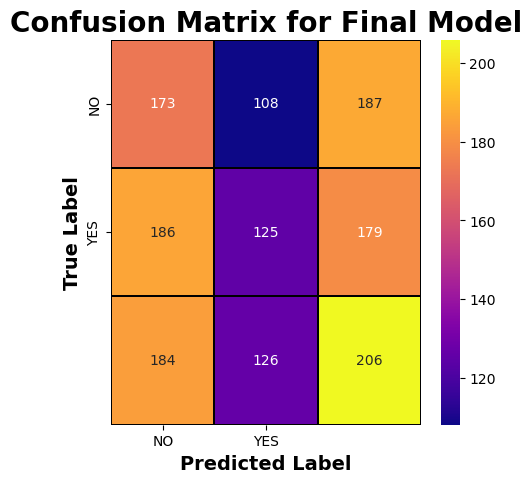

In [60]:
Matrix = confusion_matrix(y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

**Saving model**

In [61]:
import joblib
joblib.dump(final,"Capstone_occasion")

['Capstone_occasion']